# 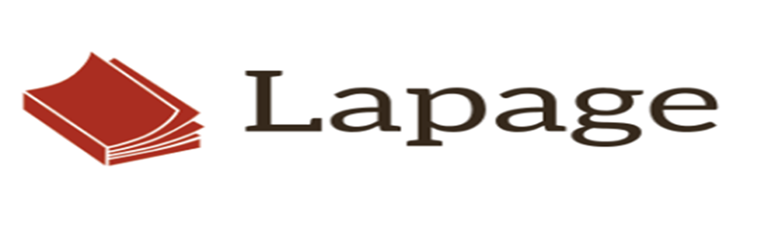

# Analyse des ventes 

   # I- CONSTRUCTION DE LA BASE DE DONNEES

In [1]:
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import math
import seaborn as sns
import datetime
from datetime import datetime, date

## 1. Chargement des bases 

### base de données des clients

In [2]:
customers = pd.read_csv('customers.csv', sep =',')
customers.head(5)


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
len(customers['client_id'].unique())

8623

In [4]:
customers["sex"].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

In [5]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [6]:
customers.duplicated().sum()

0

In [7]:
customers.duplicated(['client_id']).sum()

0

### Fichier de transactions

In [8]:
transactions = pd.read_csv('transactions.csv', sep =',')
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [9]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

### Fichier de produits

In [10]:
products = pd.read_csv('products.csv', sep =',')
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [11]:
len(products['id_prod'].unique())

3287

## 2.Constitution du fichier de travail

Pour construire la base de données de ce travail, nous allons proceder aux jointures:
Une première jointure sera faite entre le fichier de transaction et le fichier de produits sur la clé id_product afin d'avoir pour chaque session: les produits achetés, les prix, la catégorie et le client concerné. Par la suite une seconde jointure sera faite avec le fichier costumer pour ajouter les caractéristique des clients au fichier precedent

In [12]:
df1 = pd.merge(products, transactions, how='left', on=['id_prod'])  
df1

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389
1,0_1421,19.99,0,2022-11-19 03:42:20.707442,s_299590,c_8364
2,0_1421,19.99,0,2021-09-19 14:58:46.726179,s_92304,c_3544
3,0_1421,19.99,0,2023-01-11 16:04:24.367855,s_325369,c_1025
4,0_1421,19.99,0,2021-08-01 19:33:18.877168,s_70071,c_2298
...,...,...,...,...,...,...
679327,1_140,38.56,1,2022-06-30 11:10:45.544437,s_231391,c_974
679328,0_1920,25.16,0,2023-01-30 02:37:22.371278,s_334324,c_7748
679329,0_1920,25.16,0,2021-04-13 18:36:10.252971,s_20115,c_7088
679330,0_1920,25.16,0,2021-05-30 02:37:22.371278,s_41465,c_7748


In [13]:
df = pd.merge(df1, customers)
df

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991
...,...,...,...,...,...,...,...,...
679306,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997
679307,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002
679308,2_101,63.99,2,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002
679309,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002


In [14]:
df.describe()

,price,categ,birth
count,679311.000000,679311.000000,679311.000000
mean,17.449340,0.441823,1977.817976
std,18.329034,0.595002,13.579191
min,-1.000000,0.000000,1929.000000
25%,8.820000,0.000000,1970.000000
50%,13.990000,0.000000,1980.000000
75%,18.990000,1.000000,1987.000000
max,300.000000,2.000000,2004.000000


In [15]:
df.duplicated().sum()

126

In [16]:
df.isnull().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64

## 3. Nettoyage du fichier de travail

le néttoyage consiste en la suppression des doublons, la recherche et le traitement des valeurs abérrantes

In [17]:
#Recherche des doublons
df[df.duplicated()].head(20)

,id_prod,price,categ,date,session_id,client_id,sex,birth
674501,T_0,-1.0,0,test_2021-03-01 02:30:02.237419,s_0,ct_0,f,2001
674509,T_0,-1.0,0,test_2021-03-01 02:30:02.237419,s_0,ct_0,f,2001
674511,T_0,-1.0,0,test_2021-03-01 02:30:02.237426,s_0,ct_0,f,2001
674513,T_0,-1.0,0,test_2021-03-01 02:30:02.237436,s_0,ct_0,f,2001
674514,T_0,-1.0,0,test_2021-03-01 02:30:02.237446,s_0,ct_0,f,2001
674515,T_0,-1.0,0,test_2021-03-01 02:30:02.237427,s_0,ct_0,f,2001
674516,T_0,-1.0,0,test_2021-03-01 02:30:02.237419,s_0,ct_0,f,2001
674518,T_0,-1.0,0,test_2021-03-01 02:30:02.237428,s_0,ct_0,f,2001
674519,T_0,-1.0,0,test_2021-03-01 02:30:02.237426,s_0,ct_0,f,2001
674522,T_0,-1.0,0,test_2021-03-01 02:30:02.237413,s_0,ct_0,f,2001


les valeurs dupliquées ont un prix négatif égal à -1, une date avec un format non conventionnel, on suppose que ce sont des sessions de test, il sera juducieux de les supprimer

In [18]:
# on supprime tous les doublons

df2 = pd.DataFrame(df.drop_duplicates(keep=False ))
df2
               

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991
...,...,...,...,...,...,...,...,...
679306,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997
679307,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002
679308,2_101,63.99,2,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002
679309,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002


In [19]:
df2.describe()

,price,categ,birth
count,679128.000000,679128.000000,679128.000000
mean,17.454312,0.441942,1977.811729
std,18.329001,0.595038,13.575686
min,-1.000000,0.000000,1929.000000
25%,8.870000,0.000000,1970.000000
50%,13.990000,0.000000,1980.000000
75%,18.990000,1.000000,1987.000000
max,300.000000,2.000000,2004.000000


Nous allons supprimer les prix négatifs de la base de données

In [20]:
df3 = df2.drop(df2.loc[df2['price']== -1.0].index)
df3

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991
...,...,...,...,...,...,...,...,...
679306,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997
679307,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002
679308,2_101,63.99,2,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002
679309,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002


In [21]:
df3['price'].describe()

count    679111.000000
mean         17.454773
std          18.328998
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64

**Notre base est prête, nous allons l'utiliser pour construire les fichiers de travail dont nous aurons besoin pour les analyses**

## 4. Finalisation du fichier de la base de données

### Création d'une colonne âge pour les clients

In [22]:
#création des vatiables date
df3['month'] = 1
df3['day'] = 1
df3.rename(columns={'birth': 'year'}, inplace=True)
#Création de la colonne date de naissance
df3['date_naiss'] = pd.to_datetime(df3[['year', 'month', 'day']], errors = 'coerce')
df3.head(5)

,id_prod,price,categ,date,session_id,client_id,sex,year,month,day,date_naiss
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,1,1,1991-01-01
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,1,1,1991-01-01
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,1,1,1991-01-01
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,1,1,1991-01-01
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,1,1,1991-01-01


In [23]:
# on defini une fonction qui calcule l'âge en faisant une différence entre la date d'aujourd'hui et la date de naissance du client
from datetime import datetime, date
def from_dob_to_age(s):
    today = date.today()
    return today.year - s.year - ((today.month, today.day) < (s.month, s.day))
df3['age'] = df3['date_naiss'].apply(lambda x: from_dob_to_age(x))

#On peut supprimer les colonnes ayant permis de calculer l'âge
del df3['year'] 
del df3['month'] 
del df3['day'] 
del df3['date_naiss']
df3.head(5)

,id_prod,price,categ,date,session_id,client_id,sex,age
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,30
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,30
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,30
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,30
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,30


### Création d'une colonne date au format adapté

La méthode strftime() prend Datetime prend les codes de format en entrée et retourne une chaîne représentant le format spécifique spécifié en sortie. Nous utilisons %Y et %m comme codes de format pour extraire l’année et le mois.


In [24]:
# on defini une fonction qui va spliter la date selon le format proposé pour permettre à datetime de la lire
def rolly(s): 
    return datetime.strptime(s, "%Y-%m-%d %H:%M:%S.%f")    
df3['date'].apply(rolly) 
#on convertit la colonne date en datetime
df3['date'] = pd.to_datetime(df3['date'], errors = 'coerce')
df3

,id_prod,price,categ,date,session_id,client_id,sex,age
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,30
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,30
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,30
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,30
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,30
...,...,...,...,...,...,...,...,...
679306,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,24
679307,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,19
679308,2_101,63.99,2,2022-12-21 09:11:12.619736,s_315267,c_7089,m,19
679309,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,19


In [25]:
# On decompose la date en année, mois et jour
import datetime
df3['Year'] = df3['date'].dt.strftime('%Y')
df3['Month'] = df3['date'].dt.strftime('%m') 
df3['Day'] = df3['date'].dt.strftime('%d')
df3['Year'].unique()

array(['2022', '2021', '2023'], dtype=object)

En 2023 nous n'avons que les données du premier trimestre. il serait judicieux de faire les analyses sur deux années calendaires. on supprime les données de l'année 2023 du fichier.

In [26]:
# supprimer l'année 2023 dans le fichier de données

df6 = df3.drop(df3.loc[df3['Year']== '2023'].index)
df6

,id_prod,price,categ,date,session_id,client_id,sex,age,Year,Month,Day
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,30,2022,02,20
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,30,2022,10,20
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,30,2021,10,09
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,30,2021,04,28
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,30,2021,07,15
...,...,...,...,...,...,...,...,...,...,...,...
679306,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,24,2022,01,28
679307,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,19,2021,07,21
679308,2_101,63.99,2,2022-12-21 09:11:12.619736,s_315267,c_7089,m,19,2022,12,21
679309,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,19,2022,10,21


In [27]:
df6['Year'].unique()

array(['2022', '2021'], dtype=object)

In [28]:
# on renomme la colonne date
df6.rename(columns={'date': 'dateest'}, inplace=True)
#On cree une nouvelle colonne date au format souhaité
df6['date'] = pd.to_datetime(df6[['Year', 'Month', 'Day']], errors = 'coerce')
#on supprime les colonnes inutiles
#del df3['Year'] 
#del df3['Month'] 
#del df3['Day'] 
del df6['dateest'] 
df6.head(5)

,id_prod,price,categ,session_id,client_id,sex,age,Year,Month,Day,date
0,0_1421,19.99,0,s_168213,c_6389,f,30,2022,02,20,2022-02-20
1,0_1421,19.99,0,s_285450,c_6389,f,30,2022,10,20,2022-10-20
2,0_2131,8.99,0,s_102458,c_6389,f,30,2021,10,09,2021-10-09
3,0_1635,16.99,0,s_26841,c_6389,f,30,2021,04,28,2021-04-28
4,0_166,1.83,0,s_62585,c_6389,f,30,2021,07,15,2021-07-15


In [29]:
#création des classes d'âge
df6['class_age'] = pd.cut(x=df6['age'], bins=[15,25,35,45,55,65,75,92])
df6

,id_prod,price,categ,session_id,client_id,sex,age,Year,Month,Day,date,class_age
0,0_1421,19.99,0,s_168213,c_6389,f,30,2022,02,20,2022-02-20,"(25, 35]"
1,0_1421,19.99,0,s_285450,c_6389,f,30,2022,10,20,2022-10-20,"(25, 35]"
2,0_2131,8.99,0,s_102458,c_6389,f,30,2021,10,09,2021-10-09,"(25, 35]"
3,0_1635,16.99,0,s_26841,c_6389,f,30,2021,04,28,2021-04-28,"(25, 35]"
4,0_166,1.83,0,s_62585,c_6389,f,30,2021,07,15,2021-07-15,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...
679306,2_163,68.99,2,s_156517,c_7739,m,24,2022,01,28,2022-01-28,"(15, 25]"
679307,2_101,63.99,2,s_65192,c_7089,m,19,2021,07,21,2021-07-21,"(15, 25]"
679308,2_101,63.99,2,s_315267,c_7089,m,19,2022,12,21,2022-12-21,"(15, 25]"
679309,2_101,63.99,2,s_285788,c_7089,m,19,2022,10,21,2022-10-21,"(15, 25]"


### La base de donnée de travail est prête

# II- INDICATEURS SUR LE CHIFFRE D'AFFAIRES

## Fichier d'analyse

In [30]:
df4 = pd.DataFrame(df6) 
#on supprime les colonnes inutiles
del df4['Year'] 
del df4['Month'] 
del df4['Day'] 
df4

,id_prod,price,categ,session_id,client_id,sex,age,date,class_age
0,0_1421,19.99,0,s_168213,c_6389,f,30,2022-02-20,"(25, 35]"
1,0_1421,19.99,0,s_285450,c_6389,f,30,2022-10-20,"(25, 35]"
2,0_2131,8.99,0,s_102458,c_6389,f,30,2021-10-09,"(25, 35]"
3,0_1635,16.99,0,s_26841,c_6389,f,30,2021-04-28,"(25, 35]"
4,0_166,1.83,0,s_62585,c_6389,f,30,2021-07-15,"(25, 35]"
...,...,...,...,...,...,...,...,...,...
679306,2_163,68.99,2,s_156517,c_7739,m,24,2022-01-28,"(15, 25]"
679307,2_101,63.99,2,s_65192,c_7089,m,19,2021-07-21,"(15, 25]"
679308,2_101,63.99,2,s_315267,c_7089,m,19,2022-12-21,"(15, 25]"
679309,2_101,63.99,2,s_285788,c_7089,m,19,2022-10-21,"(15, 25]"


In [31]:
#faisons de la date notre index
df4.set_index('date', inplace = True)

In [32]:
df4.index

DatetimeIndex(['2022-02-20', '2022-10-20', '2021-10-09', '2021-04-28',
               '2021-07-15', '2022-10-15', '2021-06-15', '2021-07-10',
               '2021-07-29', '2022-06-29',
               ...
               '2022-10-05', '2021-08-05', '2021-09-05', '2022-10-28',
               '2022-08-28', '2022-01-28', '2021-07-21', '2022-12-21',
               '2022-10-21', '2022-03-21'],
              dtype='datetime64[ns]', name='date', length=624628, freq=None)

In [33]:
df4['Month']= df4.index.month
df4['Year']= df4.index.year
df4['Day']= df4.index.day
df4

,id_prod,price,categ,session_id,client_id,sex,age,class_age,Month,Year,Day
date,,,,,,,,,,,
2022-02-20,0_1421,19.99,0,s_168213,c_6389,f,30,"(25, 35]",2,2022,20
2022-10-20,0_1421,19.99,0,s_285450,c_6389,f,30,"(25, 35]",10,2022,20
2021-10-09,0_2131,8.99,0,s_102458,c_6389,f,30,"(25, 35]",10,2021,9
2021-04-28,0_1635,16.99,0,s_26841,c_6389,f,30,"(25, 35]",4,2021,28
2021-07-15,0_166,1.83,0,s_62585,c_6389,f,30,"(25, 35]",7,2021,15
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,2_163,68.99,2,s_156517,c_7739,m,24,"(15, 25]",1,2022,28
2021-07-21,2_101,63.99,2,s_65192,c_7089,m,19,"(15, 25]",7,2021,21
2022-12-21,2_101,63.99,2,s_315267,c_7089,m,19,"(15, 25]",12,2022,21


In [34]:
df4['Day_name']= df4.index.day_name()
df4

,id_prod,price,categ,session_id,client_id,sex,age,class_age,Month,Year,Day,Day_name
date,,,,,,,,,,,,
2022-02-20,0_1421,19.99,0,s_168213,c_6389,f,30,"(25, 35]",2,2022,20,Sunday
2022-10-20,0_1421,19.99,0,s_285450,c_6389,f,30,"(25, 35]",10,2022,20,Thursday
2021-10-09,0_2131,8.99,0,s_102458,c_6389,f,30,"(25, 35]",10,2021,9,Saturday
2021-04-28,0_1635,16.99,0,s_26841,c_6389,f,30,"(25, 35]",4,2021,28,Wednesday
2021-07-15,0_166,1.83,0,s_62585,c_6389,f,30,"(25, 35]",7,2021,15,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,2_163,68.99,2,s_156517,c_7739,m,24,"(15, 25]",1,2022,28,Friday
2021-07-21,2_101,63.99,2,s_65192,c_7089,m,19,"(15, 25]",7,2021,21,Wednesday
2022-12-21,2_101,63.99,2,s_315267,c_7089,m,19,"(15, 25]",12,2022,21,Wednesday


## Chiffre d'affaire selon certaines caracteristiques

### Chiffre d'affaires generé par les ventes en lignes durant les années 2021 et 2022

In [35]:
round(df4['price'].sum(), 2)

10879508.37

### Evolution du chiffre d'affaire dans le temps

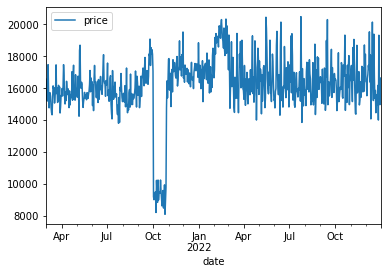

In [36]:
df4.pivot_table(df4[['price']],
              index = ['date'],
                aggfunc = np.sum,
                fill_value = 0).plot()

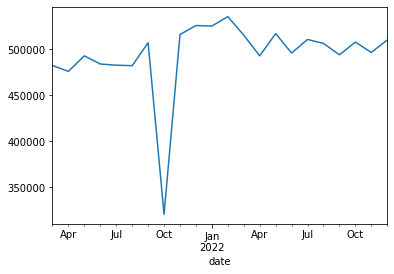

In [37]:
df4['2021': '2022']['price'].resample('M').sum().plot()

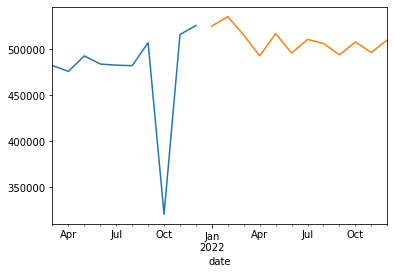

In [38]:
df4['2021']['price'].resample('M').sum().plot()
df4['2022']['price'].resample('M').sum().plot()

### Chiffre d'affaire par année

In [39]:
round(df4.groupby(["Year"]).price.sum(),2)

Year
2021    4770826.56
2022    6108681.81
Name: price, dtype: float64

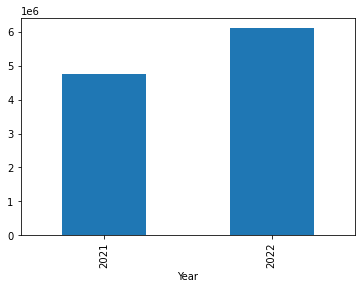

In [40]:
df4.groupby(["Year"]).price.sum().plot(kind='bar')

### Moyenne de ventes par mois

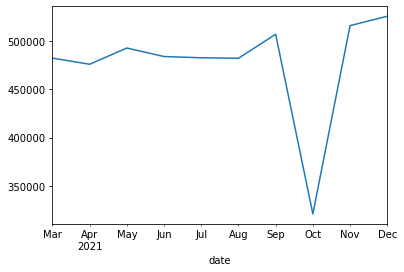

In [41]:
df4.loc['2021', 'price'].resample('M').sum().plot()

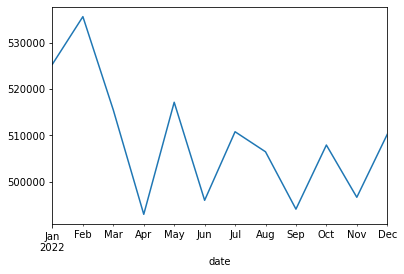

In [42]:
df4.loc['2022', 'price'].resample('M').sum().plot()

### Flop des ventes

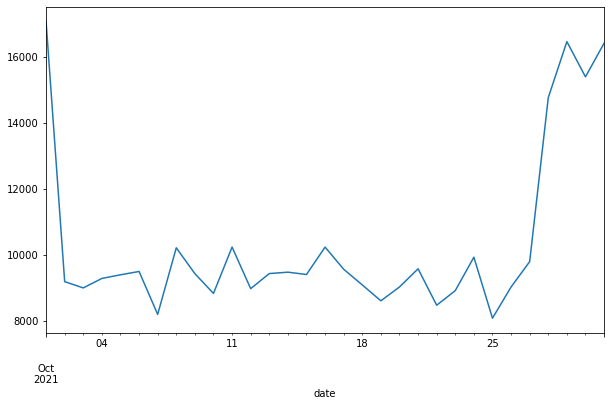

In [43]:
#FLOP
plt.figure(figsize=(10,6))
df4['2021-10']['price'].resample('D').sum().plot()

### Top des ventes

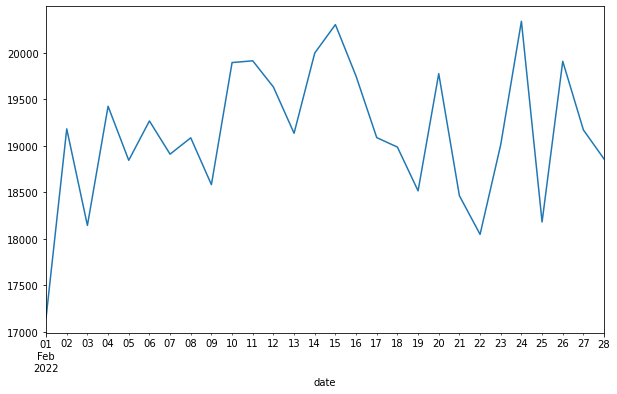

In [44]:
#TOP
plt.figure(figsize=(10,6))
df4['2022-02']['price'].resample('D').sum().plot()

### Chiffre d'affaire par catégorie de livres

In [45]:
df4.groupby(["categ"]).price.mean()

categ
0    10.638496
1    20.483890
2    76.137346
Name: price, dtype: float64

In [46]:
round(df4.groupby(["categ"]).price.sum(),2)

categ
0    4075990.91
1    4263271.04
2    2540246.42
Name: price, dtype: float64

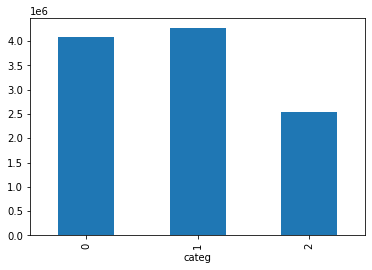

In [47]:
df4.groupby(["categ"]).price.sum().plot(kind='bar')

### Chiffre d'affaire par groupes d'âge

In [48]:
round(df4.groupby(["class_age"]).price.sum(), 2)

class_age
(15, 25]    2238551.16
(25, 35]    2219646.89
(35, 45]    2790379.02
(45, 55]    1888580.87
(55, 65]     997411.57
(65, 75]     501708.22
(75, 92]     243230.64
Name: price, dtype: float64

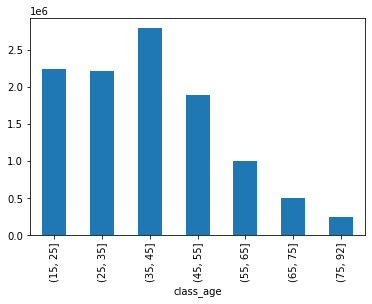

In [49]:
df4.groupby(["class_age"]).price.sum().plot(kind='bar')

In [50]:
df_age = pd.DataFrame(df4.groupby("class_age").sum()['price'])
df_age                    

,price
class_age,
"(15, 25]",2.238551e+06
"(25, 35]",2.219647e+06
"(35, 45]",2.790379e+06
"(45, 55]",1.888581e+06
"(55, 65]",9.974116e+05
"(65, 75]",5.017082e+05
"(75, 92]",2.432306e+05


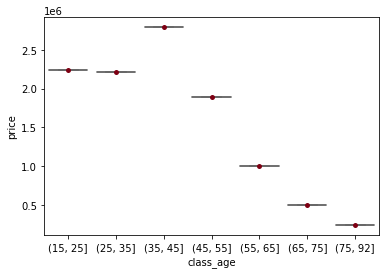

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x=df_age.index, y='price', data=df_age, color='#99c2a2')
ax = sns.swarmplot(x=df_age.index, y="price", data=df_age, color='#7d0013')
plt.show()

### Prix moyen des livres achetés par groupe d'âge

In [52]:
df4.groupby(["class_age"]).price.mean()

class_age
(15, 25]    41.751551
(25, 35]    17.201765
(35, 45]    13.180755
(45, 55]    14.958227
(55, 65]    16.805870
(65, 75]    16.607356
(75, 92]    16.822093
Name: price, dtype: float64

### Chiffre d'affaire par sexe

In [53]:
round(df4.groupby(["sex"]).price.sum(), 2)

sex
f    5372011.02
m    5507497.35
Name: price, dtype: float64

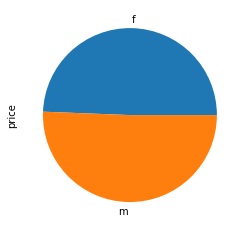

In [54]:
df4.groupby(["sex"]).price.sum().plot(kind='pie')

### Chiffre d'affaire par sexe et par catégorie

In [55]:
df4.groupby(['sex', 'categ'])['price'].aggregate('sum')

sex  categ
f    0        2.017944e+06
     1        2.160163e+06
     2        1.193904e+06
m    0        2.058047e+06
     1        2.103108e+06
     2        1.346343e+06
Name: price, dtype: float64

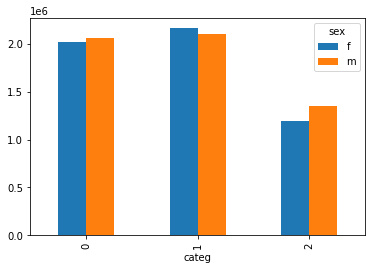

In [56]:
df4.pivot_table('price', index='categ',
                    columns='sex', aggfunc='sum').plot(kind='bar')

### Chiffre d'affaire par age et par catégorie

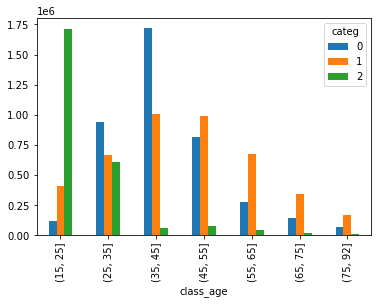

In [57]:
df4.pivot_table('price', index='class_age',
                    columns='categ', aggfunc='sum').plot(kind='bar')

### Chiffre d'affaire selon les produits les plus vendus

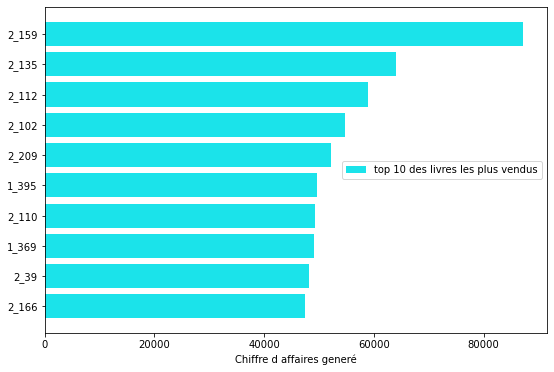

In [58]:
df0= df4.groupby('id_prod').sum()['price'].sort_values(ascending = False).head(10)
fig, axe = plt.subplots(figsize=(9,6))
y = df0
x = df0.index  
axe.barh(x, y, label='top 10 des livres les plus vendus', color='#1be3ea')
axe.legend(loc='center right')
axe.set_xlabel('Chiffre d affaires generé')
plt.gca().invert_yaxis()

### les reférences les moins vendus

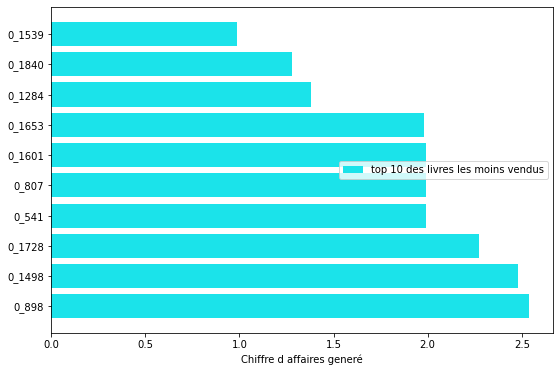

In [59]:
dfa= df4.groupby('id_prod').sum()['price'].sort_values(ascending = True).head(10)
fig, axe = plt.subplots(figsize=(9,6))
y = dfa
x = dfa.index  
axe.barh(x, y, label='top 10 des livres les moins vendus',  color='#1be3ea')
axe.legend(loc='center right')
axe.set_xlabel('Chiffre d affaires generé')
plt.gca().invert_yaxis()

### Repartition du chiffre d'affaire par client

In [60]:
print(df4.groupby('client_id').sum())

             price  categ   age  Month    Year   Day
client_id                                           
c_1         513.89      8  2442    303   74795   575
c_10       1189.11     38  3445    414  107138   828
c_100       254.85      7   232     56   16170   138
c_1000     2168.99     78  6490    793  238554  1718
c_1001     1669.27     30  3588    727  185975  1445
...            ...    ...   ...    ...     ...   ...
c_995       189.41      3   924    118   28300   140
c_996      1520.93     50  4539    647  179920  1462
c_997      1419.91     49  1458    379  109169   815
c_998      2280.92     59   980    355   99054   990
c_999       620.71     24  2280    297   80863   607

[8600 rows x 6 columns]


In [61]:
#df4.groupby('client_id')['price'].sum().sort_values(ascending = False)
df_1= df4.groupby('client_id').sum()['price'].sort_values(ascending = False).head(10)
df_1

client_id
c_1609    299507.38
c_4958    266768.28
c_6714    139623.29
c_3454    103881.22
c_3263      5025.11
c_8026      4889.93
c_1570      4792.89
c_7319      4790.71
c_2140      4777.18
c_2595      4760.39
Name: price, dtype: float64

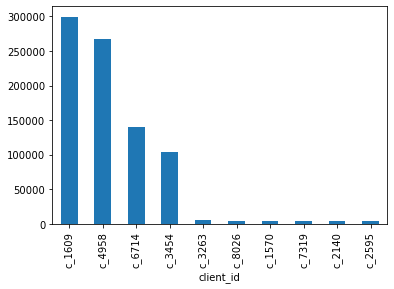

In [62]:
df_1.plot(kind='bar')

On a 04 gros clients 

In [63]:
df_2 = pd.DataFrame(df4.groupby('client_id').sum()['price'].sort_values(ascending = False).head(4))
df_2

,price
client_id,
c_1609,299507.38
c_4958,266768.28
c_6714,139623.29
c_3454,103881.22


In [64]:
print((df_2['price'].sum()/df4['price'].sum())*100)

7.443168776200359


Ces 04 clients generent 7,4% du chiffre d'affaires

### Repartition du chiffre d'affaires

In [65]:
A= pd.DataFrame(df4.groupby('client_id').sum()['price'].sort_values(ascending = True))
A

,price
client_id,
c_8351,6.31
c_8140,8.30
c_8114,9.98
c_240,11.06
c_4648,11.20
...,...
c_3263,5025.11
c_3454,103881.22
c_6714,139623.29


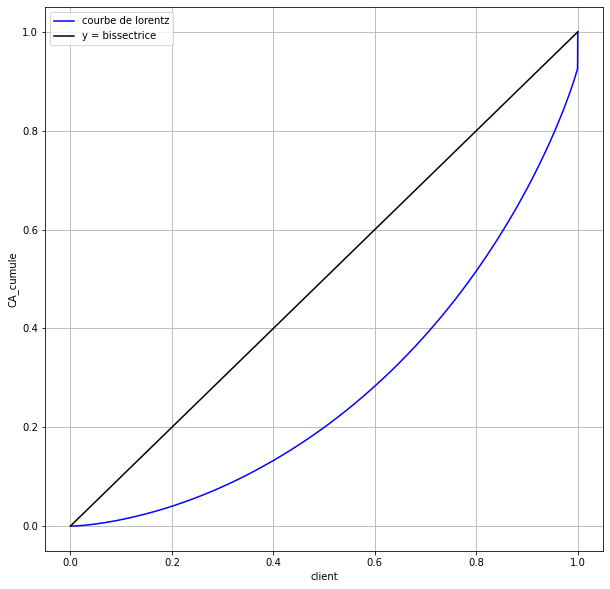

In [66]:
#'Ct'Add a numeric column called
A['Ct']=np.arange(1,len(A)+1)
#Substitute a numeric sequence for x
x = A['Ct']
#Substitute the cumulative value of G1 data for y
y = A['price'].cumsum()
#Graph drawing
fig, (ax1) = plt.subplots(figsize=(10,2*5))
#x,Standardize with the maximum value of y and draw with a blue line
ax1.plot(x/max(x),y/max(y),'blue', label='courbe de lorentz')
#As a uniform distribution, y=x graph drawing
ax1.plot(x/max(x),x/max(x),'black', label = 'y = bissectrice')
ax1.set_xlabel('client')
ax1.set_ylabel('CA_cumule')

ax1.legend()
ax1.grid(True)
plt.show()

Environ 5% des clients generent 20% du chiffre d'affaire

### Profil des clients

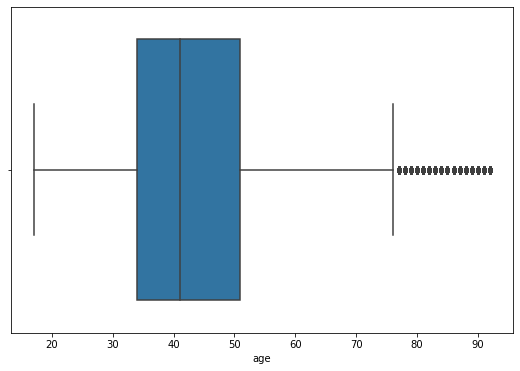

In [67]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.boxplot(x= 'age', data= df4)

In [68]:
Qi1 = (np.quantile(df4['age'], 0.25))
Qi3 = (np.quantile(df4['age'], 0.75))
IQR= Qi3-Qi1
Qi1, Qi3, IQR

(34.0, 51.0, 17.0)

In [69]:
df4['age'].mean()

43.19133788430874

In [70]:
df4['age'].median()

41.0

#### Nombre de transaction selon les tranches d'âge

In [71]:
df4['class_age'].value_counts()

(35, 45]    211701
(25, 35]    129036
(45, 55]    126257
(55, 65]     59349
(15, 25]     53616
(65, 75]     30210
(75, 92]     14459
Name: class_age, dtype: int64

# III- ANALYSE CIBLEE DES CLIENTS

## Constitution du fichier de travail

In [72]:
# Supression des données de l'année 2023
df5 = df3.drop(df3.loc[df3['Year']== '2023'].index)
del df5['Year'] 
del df5['Month'] 
del df5['Day'] 
df5['class_age'] = pd.cut(x=df5['age'], bins=[15,25,35,45,55,65,75,92])
df5.head(5)

,id_prod,price,categ,date,session_id,client_id,sex,age,class_age
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,30,"(25, 35]"
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,30,"(25, 35]"
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,30,"(25, 35]"
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,30,"(25, 35]"
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,30,"(25, 35]"


**Supression des 04 gros clients**

Pour les besoins d'analyse, nous allons supprimer les 04 gros clients de notre base car ils sont des intermediaires

In [73]:
dfz = df5.drop(df5.loc[df5['client_id'] == 'c_1609'].index)
dfe = dfz.drop(dfz.loc[dfz['client_id'] == 'c_4958'].index)
dfr = dfe.drop(dfe.loc[dfe['client_id'] == 'c_6714'].index)
df9 = dfr.drop(dfr.loc[dfr['client_id'] == 'c_3454'].index)
df9.head(5)

,id_prod,price,categ,date,session_id,client_id,sex,age,class_age
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,30,"(25, 35]"
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,30,"(25, 35]"
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,30,"(25, 35]"
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,30,"(25, 35]"
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,30,"(25, 35]"


In [74]:
#création de la colonne de frequence d'achats
df9['freq'] =1

## Tests statistiques

### 1. lien entre genre d'un client et categories de livres achetés

Pour savoir si deux variables catégorielles sont liées, on utilise le célèbre test du khi-deux. 
Dans le test qui nous intéresse l’hypothèse nulle est simplement que les deux variables testées(à savoir le sexe et la catégorie des livres achetés) sont indépendantes 

In [75]:
from scipy.stats import chi2_contingency
X = "sex"
Y = "categ"

cont = df9[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,185084,101999,15502,302585
m,172058,92511,14531,279100
Total,357142,194510,30033,581685


In [76]:
result_test = chi2_contingency(cont)
print("statistique de test :",result_test[1])
print("p_value :",result_test[0])
print("degré de liberté :",result_test[2])

statistique de test : 0.0017217283229812208
p_value : 21.15340546048899
degré de liberté : 6


In [77]:
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2, degrees, pvalue

(21.15340546048899, 6, 0.0017217283229812208)

#### Etant donné que la valeur de p(0.00172) est inférieure à 0,05, on rejette l'hypothèse nulle, les variables présentent une association statistiquement significative à n= 6 degrès de liberté

### 2. lien entre l'âge et le montant des achats

 Pour déterminer si deux variables continues sont indépendantes : le test de corrélation de Pearson. L’hypothèse nulle à tester est : l'âge et le montant des achats sont indépendants 

In [78]:
df10 = pd.DataFrame(df9.groupby(['age'])['price', 'freq'].aggregate('sum'))
df10.rename(columns={'price':'montant_achats'}, inplace=True)
df10.rename(columns={'freq':'frequence_achats'},inplace=True)
df10

<ipython-input-78-a6c8907e335e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df10 = pd.DataFrame(df9.groupby(['age'])['price', 'freq'].aggregate('sum'))


,montant_achats,frequence_achats
age,,
17,552879.36,13786
18,163948.90,3997
19,168825.67,4225
20,161953.94,3868
21,150952.85,4061
...,...,...
88,4763.18,298
89,4544.01,279
90,2578.84,156


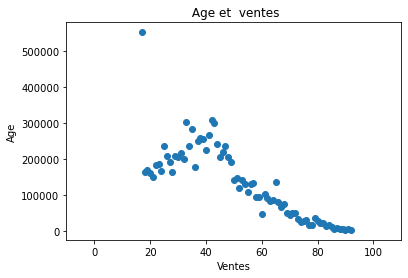

In [79]:
import matplotlib.pyplot as plt
X = df10.index
Y = df10['montant_achats']
plt.scatter(X,Y)
plt.xlim(-10,110)
plt.title(" Age et  ventes")
plt.xlabel('Ventes')
plt.ylabel('Age')
plt.show()

In [80]:
from scipy.stats import pearsonr
corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.831


In [81]:
pd.DataFrame(pearsonr(X,Y), index = ['pearson_coeff', 'p-value'], columns = ['resultat_test'])

,resultat_test
pearson_coeff,-8.307235e-01
p-value,1.655734e-20


#### Le coefficient de Pearson permet de mesurer le niveau de corrélation entre les deux variables. Il renvoie une valeur entre -1 et 1. Si il est proche de 1 cela signifie que les variables sont corrélées, proche de 0 que les variables sont décorrélées et proche de -1 qu’elles sont corrélées négativement. Le coefficient a une valeur de -0.831 ce qui signifie que les variables sont fortement corrélées negativement. on achète moins à mesure que l'âge augmente,  la p-valeur est inférieur à 5%; le modèle est significatif

### 3. Lien entre l’âge des clients et la fréquence d’achat

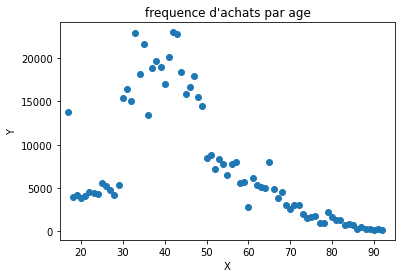

In [82]:
import matplotlib.pyplot as plt
X = df10.index
Y = df10['frequence_achats']
plt.scatter(X,Y)
plt.xlim(15,95)
plt.title("frequence d'achats par age")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [83]:
pd.DataFrame(pearsonr(X,Y), index = ['pearson_coeff', 'p-value'], columns = ['resultat_test'])

,resultat_test
pearson_coeff,-5.735470e-01
p-value,6.110691e-08


**Le coefficient de pearson a une valeur de -0.573 ce qui signifie que les variables sont  corrélées negativement. on achète moins à mesure que l'âge augmente,  la p-valeur est inférieur à 5%; le modèle est significatif**

### 4. Lien entre l’âge des clients et la taille du panier moyen

le panier moyen est egal  au total des ventes sur la frequence d'achats

In [84]:
# création de la colonne "panier moyen"
df10['panier_moyen']= df10['montant_achats']/df10['frequence_achats']
df10.head(5)

,montant_achats,frequence_achats,panier_moyen
age,,,
17,552879.36,13786,40.104407
18,163948.90,3997,41.017988
19,168825.67,4225,39.958738
20,161953.94,3868,41.870202
21,150952.85,4061,37.171349


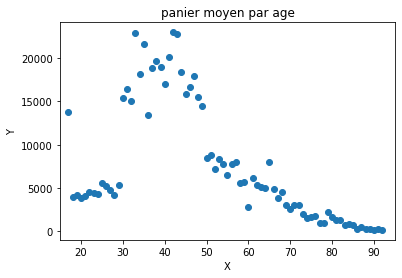

In [85]:
import matplotlib.pyplot as plt
X1 = df10.index
Y1 = df10['panier_moyen']
plt.scatter(X,Y)
plt.xlim(15,95)
plt.title("panier moyen par age")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [86]:
pd.DataFrame(pearsonr(X1,Y1), index = ['pearson_coeff', 'p-value'], columns = ['resultat_test'])

,resultat_test
pearson_coeff,-5.476624e-01
p-value,3.055056e-07


**Le coefficient de pearson a une valeur de -0.548 ce qui signifie que les variables sont  corrélées negativement. Le panier moyen diminue à mesure que l'âge augmente,  p-value est inférieur à 5%; le modèle est significatif**

### 5. Lien entre l’âge des clients et les catégories des livres achetés

**Pour savoir si une variable catégorielle et une variable quantitative sont liées, on utilise l’ANOVA ou test d’analyse de la variance. On teste ici l’hypothèse nulle à savoir la catégorie des livres achetés et l’âge sont indépendants( les moyennes des ages sont les mêmes quelque soit la catégorie de livres achetés)**


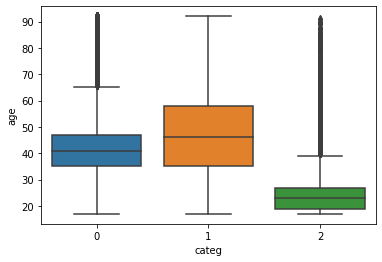

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='categ', y='age', data=df9)
plt.show()

In [88]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('categ ~ C(age)', data=df9).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(age),53885.268061,75.0,2798.087209,0.0
Residual,149340.862910,581609.0,NaN,NaN


In [89]:
model =ols('categ ~ C(age)', data=df9).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  categ   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     2798.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:32:44   Log-Likelihood:            -4.2992e+05
No. Observations:              581685   AIC:                         8.600e+05
Df Residuals:                  581609   BIC:                         8.608e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1701      0.004    271.124      0.000       1.162       1.179
C(age)[T.18]     0.0331      0.009      3.631      0.000       0.015       0.051
C(age)[T.19]     0.0043      0.009      0.487      0.626      -0.013       0.022
C(age)[T.20]     0.0036      0.009      0.394      0.694      -0.014       0.022
C(age)[T.21]    -0.0504      0.009     -5.573      0.000      -0.068      -0.033
C(age)[T.22]    -0.0098      0.009     -1.130      0.259      -0.027       0.007
C(age)[T.23]     0.0400      0.009      4.573      0.000       0.023       0.057
C(age)[T.24]    -0.0635      0.009     -7.209      0.000      -0.081      -0.046
C(age)[T.25]     0.0706      0.008      8.745      0.000       0.055       0.086
C(age)[T.26]    -0.0147      0.008     -1.787      0.074      -0.031       0.001
C(age)[T.27]     0.0358      0.009      4.208      0.000       0.019       0.052
C(age)[T.28]    -0.0100      0.009     -1.120      0.263      -0.028       0.008
C(age)[T.29]     0.0092      0.008      1.131      0.258      -0.007       0.025
C(age)[T.30]    -0.9329      0.006   -157.109      0.000      -0.944      -0.921
C(age)[T.31]    -0.9350      0.006   -159.869      0.000      -0.946      -0.924
C(age)[T.32]    -0.9327      0.006   -156.078      0.000      -0.944      -0.921
C(age)[T.33]    -0.9309      0.005   -170.370      0.000      -0.942      -0.920
C(age)[T.34]    -0.9346      0.006   -163.159      0.000      -0.946      -0.923
C(age)[T.35]    -0.9329      0.006   -168.904      0.000      -0.944      -0.922
C(age)[T.36]    -0.9163      0.006   -149.259      0.000      -0.928      -0.904
C(age)[T.37]    -0.9269      0.006   -163.297      0.000      -0.938      -0.916
C(age)[T.38]    -0.9280      0.006   -164.883      0.000      -0.939      -0.917
C(age)[T.39]    -0.9159      0.006   -161.395      0.000      -0.927      -0.905
C(age)[T.40]    -0.9249      0.006   -159.376      0.000      -0.936      -0.914
C(age)[T.41]    -0.9308      0.006   -166.164      0.000      -0.942      -0.920
C(age)[T.42]    -0.9203      0.005   -168.591      0.000      -0.931      -0.910
C(age)[T.43]    -0.9330      0.005   -170.621      0.000      -0.944      -0.922
C(age)[T.44]    -0.9310      0.006   -163.101      0.000      -0.942      -0.920
C(age)[T.45]    -0.9340      0.006   -158.358      0.000      -0.946      -0.922
C(age)[T.46]    -0.9196      0.006   -157.647      0.000      -0.931      -0.908
C(age)[T.47]    -0.9333      0.006   -162.506      0.000      -0.945      -0.922
C(age)[T.48]    -0.9243      0.006   -155.948      0.000      -0.936      -0.913
C(age)[T.49]    -0.9201      0.006   -152.674      0.000      -0.932      -0.908
C(age)[T.50]    -0.5972      0.007    -85.166      0.000      -0.611      -0.583
C(age)[T.51]    -0.5920      0.007    -85.761      0.000      -0.606      -0.579
C(age

**le R carré a une valeur de 0,265 ce qui signifie que notre modèle explique 26,5 % de la variation de notre variable « categorie de livres» par l'âge
La Prob (F-Statistic) est de 0.00
La statistique de Fisher (F-statistic) est <0,05
Il y a une différence significative de l'âge moyen des clients selon la catégorie de livres achetés;
la catégorie de livres achetés depend de l'âge des clients**



### 6. probabilité conditionnelle

P(A|B)=P(A∩B)/P(B)
P(B):La probabilité d'acheter la reference 2_159 = nombre de clients ayant acheté la reference 2_159/ nombre total de clients 
P(A):La probabilité d'acheter la reference 0_525 = nombre de clients ayant acheté la reference 0_525/ nombre total de clients 
P(A/B): la probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159

In [90]:
len(df4['client_id'].unique())

8600

In [91]:
# fichier de données
df4['freq']=1
df4.head(5)

,id_prod,price,categ,session_id,client_id,sex,age,class_age,Month,Year,Day,Day_name,freq
date,,,,,,,,,,,,,
2022-02-20,0_1421,19.99,0,s_168213,c_6389,f,30,"(25, 35]",2,2022,20,Sunday,1
2022-10-20,0_1421,19.99,0,s_285450,c_6389,f,30,"(25, 35]",10,2022,20,Thursday,1
2021-10-09,0_2131,8.99,0,s_102458,c_6389,f,30,"(25, 35]",10,2021,9,Saturday,1
2021-04-28,0_1635,16.99,0,s_26841,c_6389,f,30,"(25, 35]",4,2021,28,Wednesday,1
2021-07-15,0_166,1.83,0,s_62585,c_6389,f,30,"(25, 35]",7,2021,15,Thursday,1


In [92]:
df_prob= pd.DataFrame(df4.groupby([ 'client_id', 'id_prod']).aggregate('sum'))
df_prob

price  categ  age  Month  Year  Day  freq
client_id id_prod                                           
c_1       0_1090   13.78      0   66     12  2021   19     1
          0_1186   24.60      0  132     15  4043   50     2
          0_1378   41.88      0  198     23  6065   69     3
          0_1410   14.85      0   66     11  2021    4     1
          0_1429    7.99      0   66     10  2021   15     1
...                  ...    ...  ...    ...   ...  ...   ...
c_999     1_459    31.98      2  114     14  4043   22     2
          1_669    15.99      1   57      1  2022   16     1
          1_676    39.00      2  114     18  4043   20     2
          1_724    16.94      1   57      1  2022   19     1
          1_727    50.97      3  171     23  6065   63     3

[306906 rows x 7 columns]

In [93]:
df_prob.reset_index(inplace=True)

In [94]:
df_prob.loc[df_prob['id_prod'] == '2_159']

,client_id,id_prod,price,categ,age,Month,Year,Day,freq
1168,c_1025,2_159,291.98,4,74,15,4044,52,2
1374,c_1028,2_159,145.99,2,35,3,2022,14,1
2092,c_1050,2_159,145.99,2,36,10,2022,2,1
2585,c_1063,2_159,145.99,2,82,10,2022,27,1
3249,c_1077,2_159,145.99,2,36,5,2022,14,1
...,...,...,...,...,...,...,...,...,...
301137,c_8597,2_159,437.97,6,75,21,6065,69,3
303752,c_894,2_159,145.99,2,33,9,2021,2,1
304467,c_92,2_159,145.99,2,23,5,2021,10,1
305184,c_946,2_159,145.99,2,20,2,2022,26,1


In [95]:
df_prob.loc[df_prob['id_prod'] == '0_525']

,client_id,id_prod,price,categ,age,Month,Year,Day,freq
1134,c_1025,0_525,5.98,0,74,15,4044,52,2
1343,c_1028,0_525,2.99,0,35,3,2022,14,1
2056,c_1050,0_525,2.99,0,36,10,2022,2,1
2541,c_1063,0_525,2.99,0,82,10,2022,27,1
3220,c_1077,0_525,2.99,0,36,5,2022,14,1
...,...,...,...,...,...,...,...,...,...
298839,c_8541,0_525,2.99,0,50,6,2022,21,1
299630,c_8562,0_525,2.99,0,54,9,2021,9,1
299930,c_8572,0_525,2.99,0,55,9,2022,29,1
303735,c_894,0_525,2.99,0,33,9,2021,2,1


prob_2_159= len(df_prob.loc[df_prob['id_prod'] == '2_159'])/len(df_prob['client_id'].unique()), 

prob_0525= len(df_prob.loc[df_prob['id_prod'] == '0_525'])/len(df_prob['client_id'].unique())

Les deux événements sont indépendants,
P(A|B)=P(A)/P(B)


In [96]:
P = round(len(df_prob.loc[df_prob['id_prod'] == '0_525'])/len(df_prob.loc[df_prob['id_prod'] == '2_159']),2)
P

0.86

**la probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159= 0.86, soit 86%**